In [ ]:
import json
import requests
import gzip
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# # %matplotlib inline
# import seaborn as sns


: 

In [ ]:
data = ('../weather_api/city.list.json.gz')

In [ ]:
with gzip.open(data , 'rb') as f:
    json_content = json.loads(f.read())

In [ ]:
#Getting ids from json file and appending to dic_sities


dic_cities = [{'MN':'Bemidji'},{'MN':'Maple Lake'},{'MN':'Annandale'},{'MN':'Maple Plain'},{'MN':'Willmar'},{'MN':'Owatonna'},{'MN':'Waite Park'},{'MN':'Little Falls'},{'MN':'Albert Lea'},{'MN':'Waseca'},{'MN':'Austin'},{'MN':'Pillager'},{'MN':'Nisswa'},{'MN':'Baxter'},{'MN':'Princeton'},{'MN':'Alexandria'},{'MN':'St Cloud'},{'MN':'South Haven'},{'MN':'Pierz'},{'MN':'Clear Water'},{'MN':'Becker'},{'MN':'Rush City'},{'MN':'Hastings'},{'MN':'Big Lake'},{'MN':'Rochestar'},{'MN':'Buffalo'}]
              

listt_getting_ids=[]
for num in range(len(dic_cities)):
    for state,city in dic_cities[num].items():
        for i in range(len(json_content)): 
            if json_content[i]['country'] == 'US' and json_content[i]['name'] == city and json_content[i]['state'] == state:
                listt_getting_ids.append(json_content[i])
                
                
# print(listt_getting_ids)

In [ ]:
#Making a API call with id numbers

list_all_ko_cities=[]
for query in listt_getting_ids:
    
    api_url2 = 'http://api.openweathermap.org/data/2.5/weather?id='+str(query['id'])+'&appid=5f0573bd11f9c05220677beb94d32b6f&units=imperial'
    response = requests.get(api_url2)
    list_all_ko_cities.append(response.json())

#     print(list_all_ko_cities[0])
    

In [ ]:
list_all_ko_cities

[{'coord': {'lon': -94.8803, 'lat': 47.4736},
  'weather': [{'id': 601,
    'main': 'Snow',
    'description': 'snow',
    'icon': '13d'}],
  'base': 'stations',
  'main': {'temp': 7,
   'feels_like': 7,
   'temp_min': 5.09,
   'temp_max': 9.25,
   'pressure': 1000,
   'humidity': 86},
  'visibility': 805,
  'wind': {'speed': 0, 'deg': 0},
  'snow': {'1h': 0.25},
  'clouds': {'all': 90},
  'dt': 1640730490,
  'sys': {'type': 1,
   'id': 3448,
   'country': 'US',
   'sunrise': 1640700413,
   'sunset': 1640730921},
  'timezone': -21600,
  'id': 5017822,
  'name': 'Bemidji',
  'cod': 200},
 {'coord': {'lon': -94.0019, 'lat': 45.2291},
  'weather': [{'id': 600,
    'main': 'Snow',
    'description': 'light snow',
    'icon': '13d'},
   {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}],
  'base': 'stations',
  'main': {'temp': 18.05,
   'feels_like': 18.05,
   'temp_min': 15.1,
   'temp_max': 22.53,
   'pressure': 1004,
   'humidity': 93},
  'visibility': 4828,
  'wind': {'

In [ ]:
#Converting the data to Pandas DataFrame
data = pd.DataFrame(list_all_ko_cities)

In [ ]:
#Copying the data just in case 
data2 = data.copy(deep=False)

In [ ]:
#Converting the series to str
data2['weather'] = data2['weather'].astype(str)
# data2['weather']

In [ ]:
#Cleaning weather series to get only the weather condition and id
data2['weather1'] = data2['weather'].map(lambda weather:weather.split("main': '")[1].split("', 'description")[0])
data2['id']= data2['weather'].map(lambda weather:weather.split("'id': ")[1].split(", 'main'")[0])


In [ ]:
#Filtering desired columnns and renaming "main" column to "City"
data = data2[['weather1','id','name','main']]
data = data.rename(columns={'name':'city'},errors="raise")
data



,weather1,id,city,main
0,Snow,601,Bemidji,"{'temp': 7, 'feels_like': 7, 'temp_min': 5.09,..."
1,Snow,600,Maple Lake,"{'temp': 18.05, 'feels_like': 18.05, 'temp_min..."
2,Snow,600,Annandale,"{'temp': 17.55, 'feels_like': 12.97, 'temp_min..."
3,Snow,600,Maple Plain,"{'temp': 19.83, 'feels_like': 12.87, 'temp_min..."
4,Snow,600,Willmar,"{'temp': 9, 'feels_like': -3.6, 'temp_min': -0..."
5,Snow,600,Owatonna,"{'temp': 23.13, 'feels_like': 23.13, 'temp_min..."
6,Snow,601,Waite Park,"{'temp': 14.58, 'feels_like': 14.58, 'temp_min..."
7,Snow,600,Little Falls,"{'temp': 12.42, 'feels_like': 6.35, 'temp_min'..."
8,Snow,600,Albert Lea,"{'temp': 26.47, 'feels_like': 26.47, 'temp_min..."
9,Snow,600,Waseca,"{'temp': 23.58, 'feels_like': 19.11, 'temp_min..."


<Figure size 2160x2160 with 0 Axes>

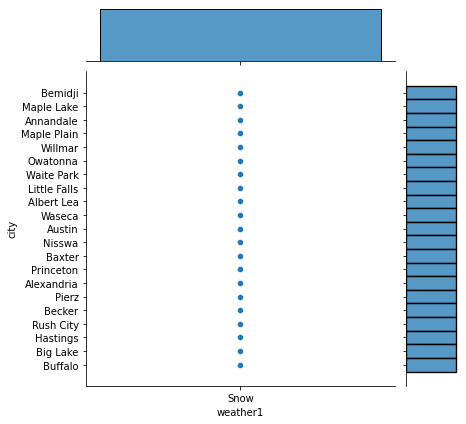

<Figure size 2160x2160 with 0 Axes>

In [ ]:
weath = sns.jointplot(x='weather1',y='city',data=data)
weath
plt.figure(figsize=(30, 30))


<AxesSubplot:title={'center':'Overall Region Weather'}, xlabel='weather1', ylabel='count'>

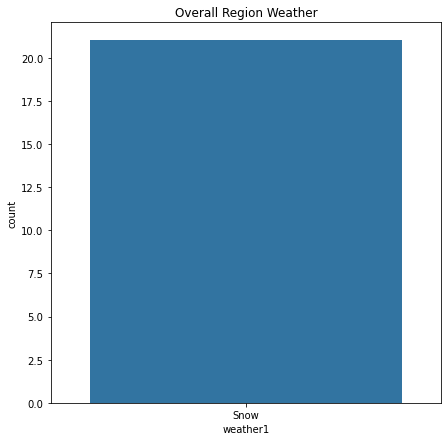

In [ ]:
plt.figure(figsize=(7, 7))
plt.title('Overall Region Weather')
sns.countplot(x='weather1',data=data)

In [ ]:
#Getting only the heavy snow weather
snow = data.loc[(data2['weather1'] == ('Snow')) & (data2['id'] == '601') | (data2['id'] == '602') ]
snow

#filtering different weather conditions if needed
#cloudy = filtered_data2[(filtered_data2['weather']=='Clouds') | (filtered_data2['weather'] == 'Thunderstorm') | (filtered_data2['weather'] == 'Snow')]

,weather1,id,city,main
0,Snow,601,Bemidji,"{'temp': 7, 'feels_like': 7, 'temp_min': 5.09,..."
6,Snow,601,Waite Park,"{'temp': 14.58, 'feels_like': 14.58, 'temp_min..."
14,Snow,601,Alexandria,"{'temp': 2.86, 'feels_like': -9.74, 'temp_min'..."
15,Snow,601,Pierz,"{'temp': 12.97, 'feels_like': 7, 'temp_min': 1..."
16,Snow,601,Becker,"{'temp': 18.03, 'feels_like': 10.4, 'temp_min'..."
17,Snow,601,Rush City,"{'temp': 17.6, 'feels_like': 17.6, 'temp_min':..."
19,Snow,601,Big Lake,"{'temp': 18.93, 'feels_like': 11.23, 'temp_min..."


In [ ]:
# for x in snow['weather1']:
#     if x == 'Snow':
#         print(x)   

In [ ]:
import csv
from time import sleep
import win32com.client as client
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

In [ ]:
#Converting dataframe to html format
html_table = snow.to_html()


In [ ]:
#Creating a conditional email alert
# for x in data['weather1']:
#     res = sum(1 for x in data['weather1'] if x == 'Snow')


In [ ]:
#Creating a conditional email alert

for x in data['id']:
    res = sum(1 for x in data['id'] if (x == '601')| (x == '602'))



In [ ]:
res

7

In [ ]:
#Sending email to poeple who are listed in csv file
if res >= 1:


        # open distribution list
        with open('people3.csv', 'r', newline='') as f:
            reader = csv.reader(f)
            distro = [row for row in reader]

        # chunk distribution list into blocks of 30
        chunks = [distro[x:x+30] for x in range(0, len(distro), 30)]

        # create outlook instance
        outlook = client.Dispatch('Outlook.Application')


        # iterate through chunks and send mail
        for chunk in chunks:
            # iterate through each recipient in chunk and send mail
            for name, address in chunk:
                message = outlook.CreateItem(0)
                message.To = address
                message.Subject = "KO Storage Snow & Weather Report"
                message.HTMLBody = '<h4 style="font-family:verdana;">'+html_table+'Real Time Weather Snow Report</h4><p style="font-family:verdana">Note: Snow weather report runs twice daily and reports to you via e-mail only when it is snowing <p style="font-family:verdana">Weather Source:</p><p style="font-family:verdana">https://openweathermap.org/ </p> <p style="font-family:verdana">See facilities above for the latest snowfall report</p><p style="font-family:verdana">Please contact Varol if you would like to subscribe to weather alerts or report any issues,</p><p style="font-family:verdana"> KO Storage</p><img src="KO (45).png" alt="KO Storage logo" width="300" height="150">'
#                 message.HTMLBody = str(cloudy)
                #message.Body = template.format(name)
                message.Send()

            # wait 60 seconds before sending next chunk
            sleep(10)

In [ ]:
# import requests
# from pprint import pprint
# def weather_data(query):
# 	res=requests.get(api_url2);
# 	return res.json();
# def print_weather(result,city):
# 	print("{}'s temperature: {}°C ".format(city,result['main']['temp']))
# 	print("Wind speed: {} m/s".format(result['wind']['speed']))
# 	print("Description: {}".format(result['weather'][0]['description']))
# 	print("Weather: {}".format(result['weather'][0]['main']))
# def main():
# 	city=input('Enter the city:')
# 	print()
# 	try:
# 	  query='q='+city;
# 	  w_data=weather_data(query);
# 	  print_weather(w_data, city)
# 	  print()
# 	except:
# 	  print('City name not found...')
# if __name__=='__main__':
# 	main()

In [ ]:
# def weather_data(query):
# 	res=requests.get('http://api.openweathermap.org/data/2.5/weather?'+Brazilquery+'&APPID=5f0573bd11f9c05220677beb94d32b6f&units=metric');
# 	return res.json()

In [ ]:


# weather_data(query = 'Minneapolis')